# Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('/kaggle/input/us-sales-cars-dataset/cars.csv', encoding='utf-16', sep=',')
data.head(10)

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0
5,Volkswagen,Golf,2022,Certified,13895.0,Volkswagen of Beaumont,34000.0
6,GMC,Yukon,2021,Used,68506.0,BMW of Beaumont,56954.0
7,BMW,M340,2023,New,NaN,BMW of Beaumont,61715.0
8,Hyundai,Sonata,2023,New,NaN,Hyundai of Silsbee,37945.0
9,Hyundai,Sonata,2023,New,NaN,Hyundai of Silsbee,33495.0


# Data Cleaning

In [2]:
#fixing the mileage column
def fixMile(line):
    
    if str(line) == "nan":
        return 0
    return line
data["Mileage"] = data["Mileage"].apply(fixMile)

In [3]:
#fixing the brands column
brands = ['mazda', 'kia', 'chevrolet', 'ford', 'acura', 'volkswagen', 'gmc', 'bmw', 'hyundai', 'jeep', 'dodge', 'cadillac', 'infiniti', 'honda', 'lexus', 'toyota', 'buick', 'lincoln', 'mini', 'ram', 'land rover', 'audi', 'nissan', 'mercedes', 'porsche', 'subaru', 'jaguar', 'tesla', 'volvo']
def fixBrands(line):
    if line.lower() not in brands:
        return "other"
    return line.lower()
data["Brand"] = data["Brand"].apply(fixBrands)
data["Brand"].value_counts()

Brand
ford          17504
chevrolet     14827
toyota        14573
jeep           8466
gmc            7529
bmw            7233
honda          6168
mercedes       5830
other          5415
lexus          5385
ram            5215
kia            4746
audi           4679
nissan         4270
mazda          3376
hyundai        3353
cadillac       3307
volkswagen     3135
dodge          3118
subaru         2618
land rover     2224
acura          2037
volvo          1848
porsche        1698
lincoln        1480
infiniti       1447
buick          1296
tesla          1026
jaguar          721
mini            343
Name: count, dtype: int64

In [4]:
#fixing year column
print("To anyone that might be listening, this is the oldest car in the dataset. it is a Used Buick LeSabre from 1968")
print(data.loc[data["Year"] == 1968])
def fixYear(line):
    if line > 1900:
        return 2024 - int(line)
    return line
data["Year"] = data["Year"].apply(fixYear)
data["Year"].unique()

To anyone that might be listening, this is the oldest car in the dataset. it is a Used Buick LeSabre from 1968
        Brand    Model  Year Status  Mileage              Dealer    Price
143651  buick  LeSabre  1968   Used   2393.0  Bob Johnson Toyota  12989.0


array([ 1,  0,  3,  2,  5,  7, 12,  4, 16, 11,  9,  6, 21, 14, 10, 13, 18,
       17, 15,  8, 19, 20, 25, 32, 24, 23, 54, 31, 22, 29, 26, 27, 34, 30,
       28, 47, 33, 51, 55, 37, 36, 42, 53, 49, 45, 48, 52, 50, 46, 39, 40,
       35, 38, 57, 58, 65, 41, 56])

In [5]:
#fixing status
def fixStatus(line):
    if line == "Certified" or line == "New":
        return 1
    return 0
data["Status"] = data["Status"].apply(fixStatus)
data["Status"].value_counts()

Status
1    96560
0    48307
Name: count, dtype: int64

In [6]:
#fixing price
def fixPrice(line):
    try:
        return int(line)
    except:
        return int(-1)
data["Price"] = data["Price"].apply(fixPrice)
data = data.loc[data["Price"] != -1]
print(data["Price"].unique())

[ 36703  28990  41425 ... 127240 122455 125930]


In [7]:
new_data = data.loc[:,["Brand","Year","Status","Mileage","Price"]]

new_data["Brand"].value_counts()

Brand
ford          17039
chevrolet     14398
toyota        13974
jeep           8283
gmc            7270
bmw            7144
honda          5948
mercedes       5736
other          5261
lexus          5247
ram            5073
kia            4622
audi           4532
nissan         4195
hyundai        3297
mazda          3254
cadillac       3138
volkswagen     3062
dodge          3045
subaru         2541
land rover     2182
acura          1997
volvo          1811
porsche        1696
lincoln        1439
infiniti       1439
buick          1265
tesla          1026
jaguar          701
mini            341
Name: count, dtype: int64

# Visualizing data

Brand vs. Price
Axes(0.125,0.11;0.775x0.77)


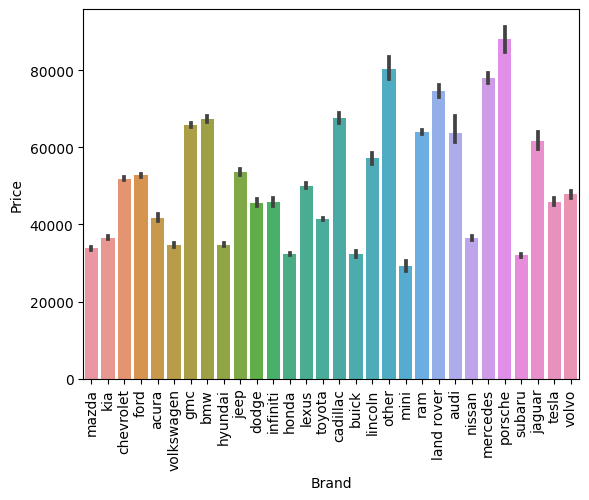

In [8]:
print("Brand vs. Price")
plot = sns.barplot(data = new_data,x = "Brand",y="Price")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
print(plot)

Year vs. Price


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Note: there is less data for the older cars. Half the data is for cars made 0 to 10 years ago, and cars made 50-60 years ago have one car each to represent two years 


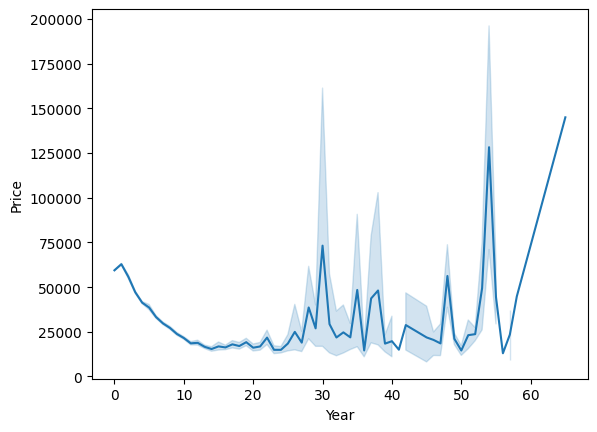

In [9]:
print("Year vs. Price")
sns.lineplot(data = new_data,x = "Year",y = "Price")
print("Note: there is less data for the older cars. Half the data is for cars made 0 to 10 years ago, and cars made 50-60 years ago have one car each to represent two years ")

Status vs. Price (Outliers cut out)
0 = Used 
1 = New


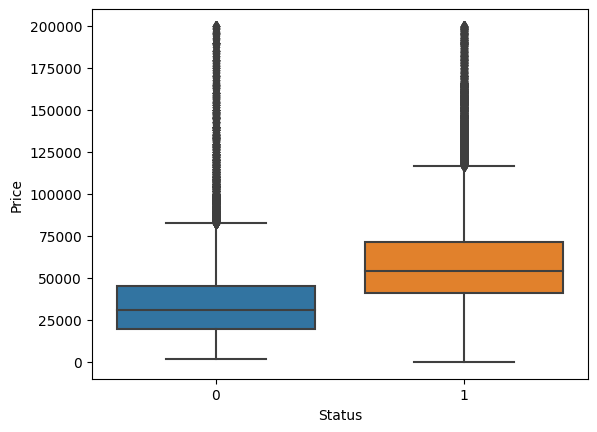

In [10]:
print("Status vs. Price (Outliers cut out)")
sns.boxplot(data = new_data.loc[new_data["Price"] < 200000],x = "Status",y = "Price")
print("0 = Used \n1 = New")

Mileage vs. Price


<Axes: xlabel='Mileage', ylabel='Price'>

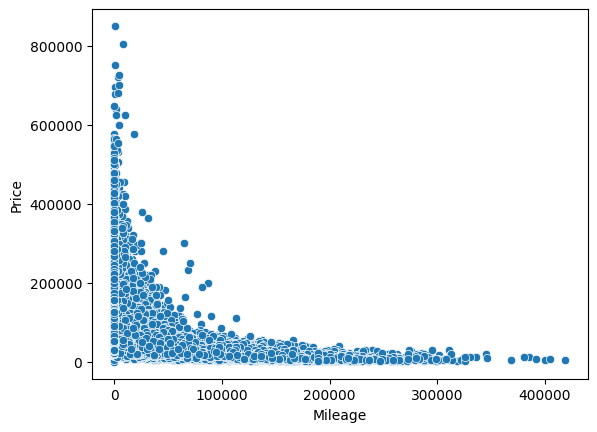

In [11]:
print("Mileage vs. Price")
sns.scatterplot(data = new_data.loc[new_data["Price"] < 1000000],x = "Mileage",y = "Price")

# Collecting Input

In [12]:
try:
    brands = ['mazda', 'kia', 'chevrolet', 'ford', 'acura', 'volkswagen', 'gmc', 'bmw', 'hyundai', 'jeep', 'dodge', 'cadillac', 'infiniti', 'honda', 'lexus', 'toyota', 'buick', 'lincoln', 'mini', 'ram', 'land rover', 'audi', 'nissan', 'mercedes', 'porsche', 'subaru', 'jaguar', 'tesla', 'volvo']
    brandsStr = "Mazda, Kia, Chevrolet, Ford, Acura, Volkswagen, GMC, BMW, Hyundai, Jeep, Dodge, Cadillac, Infiniti, Honda, Lexus, Toyota, Buick, Lincoln, MINI, RAM, Land Rover, Audi, Nissan, Mercedes, Porsche, Subaru, Jaguar, Tesla, Volvo"
    print("what is your car's brand? Here are the brands:\n")
    print(brandsStr + "\n")
    print("If you car isn\'t in the list type \"other\"")
    brand = input().lower()
    if brand not in brands:
        if brand != "any":
            brand = "other"
    if brand != "any":
        brand_data = new_data.loc[new_data["Brand"] == brand]

    ans = []
    #brand_data = brand_data.loc[brand_data["Price"] != -1]
    print("how many years ago was this car made?")
    while True:
        inp = input()
        try:
            ans.append(int(inp))
            break
        except:
            print("We didn\'t get that, please try again")
    print("Is this car used? yes or no")
    while True:
        inp = input()
        if inp.lower() == "yes":
            ans.append(0)
            break
        if inp.lower() == "no":
            ans.append(1)
            break
        print("We didn\'t get that, please try again")
    if ans[-1] == 1:
        ans.append(0)
    else:
        print("How many miles is on the car?")
        while True:
            inp = input()
            try:
                ans.append(int(inp))
                break
            except:
                print("We didn\'t get that, please try again")
except:
    ans = [5, 0, 53760]
    brand_data = new_data.loc[new_data["Brand"] == "honda"]
print(ans)

what is your car's brand? Here are the brands:

Mazda, Kia, Chevrolet, Ford, Acura, Volkswagen, GMC, BMW, Hyundai, Jeep, Dodge, Cadillac, Infiniti, Honda, Lexus, Toyota, Buick, Lincoln, MINI, RAM, Land Rover, Audi, Nissan, Mercedes, Porsche, Subaru, Jaguar, Tesla, Volvo

If you car isn't in the list type "other"
[5, 0, 53760]


# Building Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
X = brand_data.loc[:,["Year","Status","Mileage"]]
Y = brand_data.loc[:,["Price"]]

In [14]:
from sklearn.tree import DecisionTreeClassifier as dtc
trainX,testX,trainY,testY = train_test_split(X,Y,random_state = 2,test_size = .15)
tree = dtc()
tree.fit(trainX,trainY)
results = tree.predict(testX)
copy = testX
copy.loc[len(testX.index)-1] = ans
if r2_score(results,testY) < 0:
    print("Estimated Accuracy: Unsure")
else:
    print("Estimated Accuracy: " + str(round(r2_score(results,testY) * 100)) + "%")
results = list(tree.predict(copy))
print("Estimated Price for Decision Tree: $" + str(results[-1]))

Estimated Accuracy: 25%
Estimated Price for Decision Tree: $19998


In [15]:
from sklearn import svm
trainX,testX,trainY,testY = train_test_split(X,Y,random_state = 2,test_size = .15)
tree = svm.SVC()
tree.fit(trainX,trainY)
results = tree.predict(testX)
copy = testX
copy.loc[len(testX.index)-1] = ans
if r2_score(results,testY) < 0:
    print("Estimated Accuracy: Unsure")
else:
    print("Estimated Accuracy: " + str(round(r2_score(results,testY) * 100)) + "%")
results = list(tree.predict(copy))
print("Estimated Price for SVM: $" + str(results[-1]))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimated Accuracy: Unsure
Estimated Price for SVM: $24500


In [16]:
from sklearn import linear_model
trainX,testX,trainY,testY = train_test_split(X,Y,random_state = 2,test_size = .15)
tree = linear_model.LogisticRegression()
tree.fit(trainX,trainY)
results = tree.predict(testX)
copy = testX
copy.loc[len(testX.index)-1] = ans
if r2_score(results,testY) < 0:
    print("Estimated Accuracy: Unsure")
else:
    print("Estimated Accuracy: " + str(round(r2_score(results,testY) * 100)) + "%")
results = list(tree.predict(copy))
print("Estimated Price for Logistic Regression: $" + str(results[-1]))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimated Accuracy: Unsure
Estimated Price for Logistic Regression: $14995


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
